In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/shwetachandel/Black-Friday-Dataset/master/Black%20Friday%20Dataset/train.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7feec155f130>,
 'caps': [<matplotlib.lines.Line2D at 0x7feec155f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feec1541ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feec155feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feec156d280>],
 'means': []}

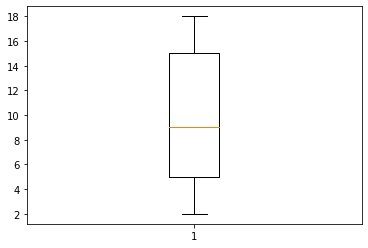

In [6]:
plt.boxplot(data.Product_Category_2.dropna())

In [7]:
data.Product_Category_2.fillna("others",inplace=True)

In [8]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
data.shape

(550068, 12)

In [10]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [11]:
x = data.iloc[0:,2:10]
y = data.Purchase

In [12]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,A,2,0,3,others
1,F,0-17,10,A,2,0,1,6.0
2,F,0-17,10,A,2,0,12,others
3,F,0-17,10,A,2,0,12,14.0
4,M,55+,16,C,4+,0,8,others


In [13]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [14]:
trainx,testx = train_test_split(x,test_size = 0.2)
trainy,testy = train_test_split(y,test_size = 0.2)

In [15]:
dummy = pd.get_dummies(x)

In [16]:
dummy = pd.get_dummies(dummy,columns=["Occupation","Product_Category_1"])

In [17]:
dummy.head()

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,others,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,others,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,others,NaN,7969


In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(dummy)

MinMaxScaler()

In [21]:
scaler.data_max_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
d = scaler.transform(dummy)

In [23]:
df = pd.DataFrame(d)

In [24]:
trainx1,testx1 = train_test_split(df,test_size = 0.2)

<h1>Linear Regression</h1>

In [25]:
 reg1 = LinearRegression().fit(trainx1,trainy)

In [26]:
reg1.predict(testx1)

array([9240., 9208., 9320., ..., 9188., 9284., 9144.])

In [27]:
reg1.score(df,y)

-0.003010743535188265

<h1>Decision Tree</h1>

In [28]:
reg2 = DecisionTreeRegressor(random_state=0).fit(trainx1,trainy)

In [29]:
reg2.predict(testx1)

array([ 9592.14666667,  9548.48611111,  9425.9047619 , ...,
        8148.125     ,  8745.        , 10779.        ])

In [30]:
reg2.score(df,y)

-0.20099747197063378

<h1>Random forest</h1>

In [31]:
reg3 = RandomForestRegressor(max_depth=2, random_state=0).fit(trainx1,trainy)

In [32]:
reg3.predict(testx1)

array([9256.6052597 , 9256.99736315, 9267.13690371, ..., 9260.00667268,
       9264.03293342, 9258.26183712])

In [33]:
reg3.score(df,y)

-0.00010223796284325459

<h1>Adab boosting</h1>

In [34]:
regr4 = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx1,trainy)

In [35]:
regr4.predict(testx1)

array([10048.97777148, 10048.97777148, 10048.97777148, ...,
        9978.76537125, 10048.97777148, 10048.97777148])

In [36]:
regr4.score(testx1,testy)

-0.022621928938107105

<h1>gradient boosting</h1>

In [37]:
reg5 = GradientBoostingRegressor(random_state=0).fit(trainx1,trainy)

In [38]:
reg5.predict(testx1)

array([9246.37570857, 9218.09030231, 9324.0155219 , ..., 9238.28418035,
       9286.3846911 , 9152.23913851])

In [39]:
reg5.score(testx1,testy)

-0.00015358101610485342

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(trainx1)
x1 = pca.explained_variance_ratio_
x1 = pca.explained_variance_ratio_

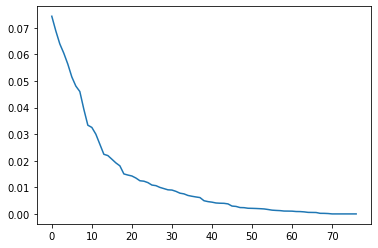

In [41]:
plt.plot(x1)

In [42]:
import numpy as np
x2=np.cumsum(x1)

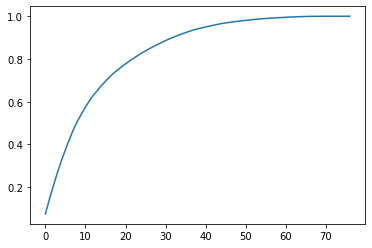

In [43]:
plt.plot(x2)

In [44]:
pca = PCA(n_components=56)
pca.fit(trainx1)

PCA(n_components=56)

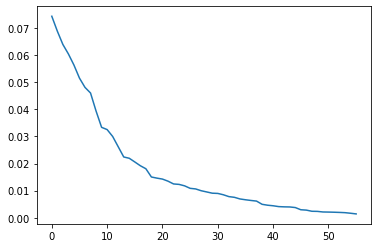

In [45]:
x1 = pca.explained_variance_ratio_
x1 = pca.explained_variance_ratio_
plt.plot(x1)

In [46]:
ks=pca.transform(trainx1)

In [47]:
ks=pd.DataFrame(ks)

In [48]:
ks.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.139439,-0.600813,-0.202489,-0.462671,-0.231548,-0.570496,-0.617853,0.137867,0.427522,-0.128929,...,0.066674,0.252246,0.178171,-0.540467,0.070107,-0.243185,0.065540,-0.001847,-0.011326,-0.019853
1,-0.895757,0.559254,-0.173180,0.435387,-0.404496,-0.843251,0.169907,-0.247484,0.422316,0.649692,...,-0.001410,0.646703,0.459939,0.531547,-0.070136,-0.234610,0.010457,-0.017466,0.014926,-0.010224
2,-0.632997,-0.648658,-0.711623,0.032565,-0.136381,-0.642429,-0.244434,0.471772,0.513934,0.694553,...,-0.001720,0.038589,-0.104131,0.001207,0.004280,0.000859,0.008223,0.018367,0.054366,-0.049694
3,-0.123133,0.232231,0.404219,-0.084935,0.442091,1.356259,0.692365,0.662840,0.127032,-0.001455,...,0.038066,-0.019571,0.035544,-0.020063,-0.019573,0.013163,-0.000374,-0.008618,0.003586,0.006431
4,-0.015102,-0.688929,-0.020976,-0.877502,0.316531,-0.192879,-0.318727,-0.018365,-0.694086,-0.128509,...,-0.201392,-0.093842,0.123152,-0.006157,0.087487,-0.025117,-0.156249,0.030598,0.120392,-0.127747


In [63]:
finalmodel = GradientBoostingRegressor(random_state=0).fit(dummy,y)
finalmodel.predict(dummy)
finalmodel.score(dummy,y)

0.6367203760216396

In [66]:
import pickle
file=open('gradient_boosing.pkl','kskv')

ValueError: invalid mode: 'kskv'